# Project Python: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data then get the answers for those questions.

In [4]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? 

In [5]:
df.shape

(1898, 9)

#### Observations:
- There are 1898 rows and 9 columns in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- There are attributes of different types (*int*, *float*, *object*) in the data.
- There is 1 column containing datatype of float64 (cost_of_the_order)
- There are 4 columns containing datatype of int64 (order_id, customer_id, food_preparation_time, delivery_time)
- There are 4 columns containing datatype of object (restaurant_name, cuisine_type, ay_of_the_week, rating)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [5]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- At the first sight, there seems to be no null value in any columns of the data. So there is no treatment needed for missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [16]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898,NaN,NaN,NaN,1.4775e+06,548.05,1.47655e+06,1.47702e+06,1.4775e+06,1.47797e+06,1.47844e+06
customer_id,1898,NaN,NaN,NaN,171168,113698,1311,77787.8,128600,270525,405334
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898,NaN,NaN,NaN,16.4989,7.48381,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898,NaN,NaN,NaN,27.372,4.63248,20,23,27,31,35
delivery_time,1898,NaN,NaN,NaN,24.1617,4.97264,15,20,25,28,33


#### Observations:
- The mininum time for preparing food is 20 minutes.
- The average time for preparing food is 27.372 minutes.
- The max time for preparing food is 35 minutes.



### **Question 5:** How many orders are not rated? 

In [19]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [21]:
df.loc[df['rating']=='Not given']['rating'].value_counts()

Not given    736
Name: rating, dtype: int64

In [24]:
# Or another way to do this question:
df[df['rating']=='Not given']['rating'].value_counts()

Not given    736
Name: rating, dtype: int64

#### Observations:
- There are 736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

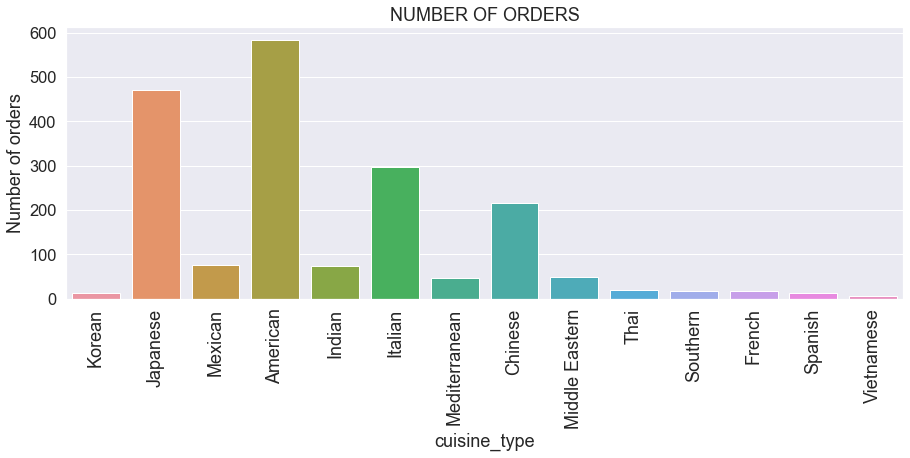

In [601]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90, fontsize=18)
plt.ylabel('Number of orders')
plt.title('NUMBER OF ORDERS');

In [10]:
df['cuisine_type'].value_counts().nlargest(4)

American    584
Japanese    470
Italian     298
Chinese     215
Name: cuisine_type, dtype: int64

### Observation 1:
- From the graph above, the top 4 cuisine which customers order the most include American, Japanese, Italian, and Chiness.
-In details, the American cuisine is the top 1 popular cuisine which has 584 orders, followed by Japanese ( 470 orders) and Italian (298 orders).
- The Vietnames cuisine is least popular cuisine which only has 7 orders placed.

In [292]:
df['restaurant_name'].value_counts().head(10).index

Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway',
       'RedFarm Hudson', 'TAO', 'Han Dynasty',
       'Blue Ribbon Sushi Bar & Grill'],
      dtype='object')

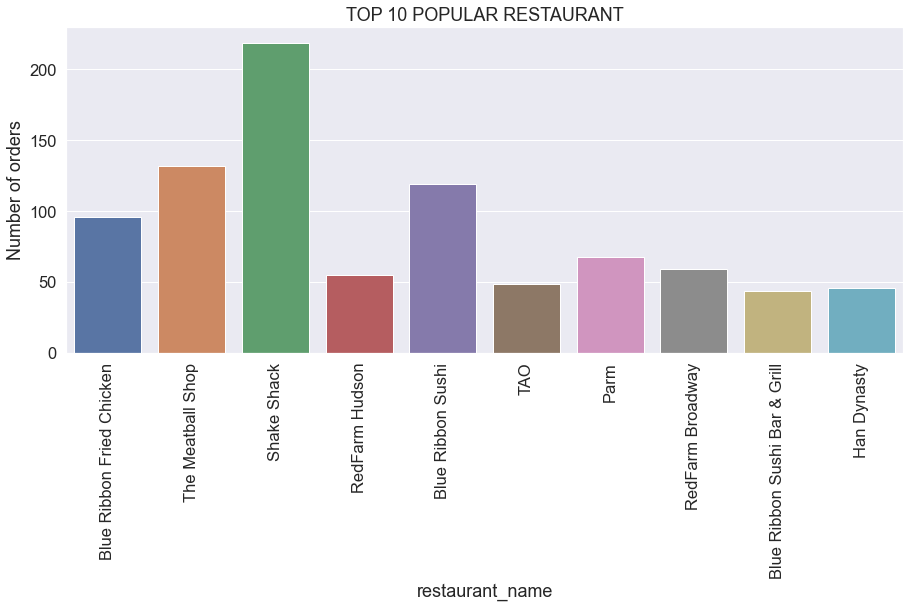

In [605]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 6))
sns.countplot(data=df[df['restaurant_name'].isin(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway','RedFarm Hudson', 'TAO', 
        'Han Dynasty','Blue Ribbon Sushi Bar & Grill'])], x='restaurant_name')
plt.xticks(rotation=90)
plt.ylabel('Number of orders')
plt.title('TOP 10 POPULAR RESTAURANT');

### Observations 2:
- Above is the top ten popular restaurants.
- The Shake Shack seems like the most popular restaurant with the greatest number of orders from customers.
- The second and third famous restaurant are The Meatball Shop and Blue Ribbon Sushi respectively.
 

In [12]:
df['customer_id'].value_counts().nlargest(10)

52832     13
47440     10
83287      9
250494     8
259341     7
65009      7
82041      7
276192     7
107909     6
60052      6
Name: customer_id, dtype: int64

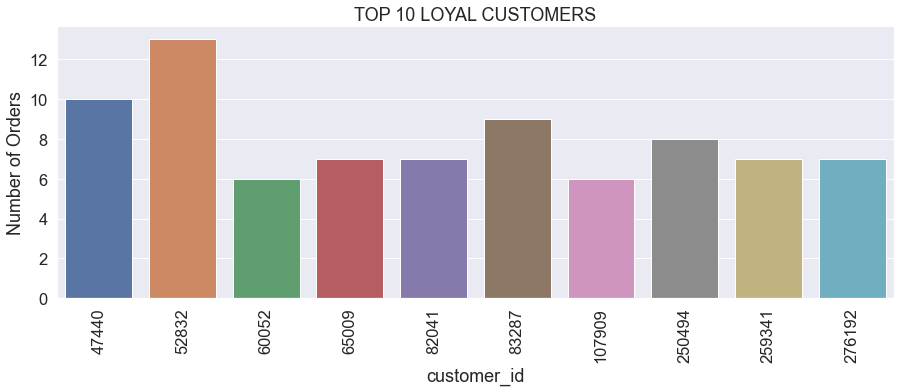

In [608]:
plt.figure(figsize=(15,5))
sns.countplot(data=df[df['customer_id'].isin([52832, 47440, 83287, 250494, 259341, 65009, 82041, 276192, 107909,
            60052])], x='customer_id')
plt.xticks(rotation=90)
plt.title('TOP 10 LOYAL CUSTOMERS')
plt.ylabel('Number of Orders');

### Observation 3:
- The most loyal customer has order 13 orders so far, which is not much.
- Other top 10 customers have placed orders from around 6 to 10 times in total.
- Mostly, customers order only one or two times with the app.
- The app does not have many loyal customers.


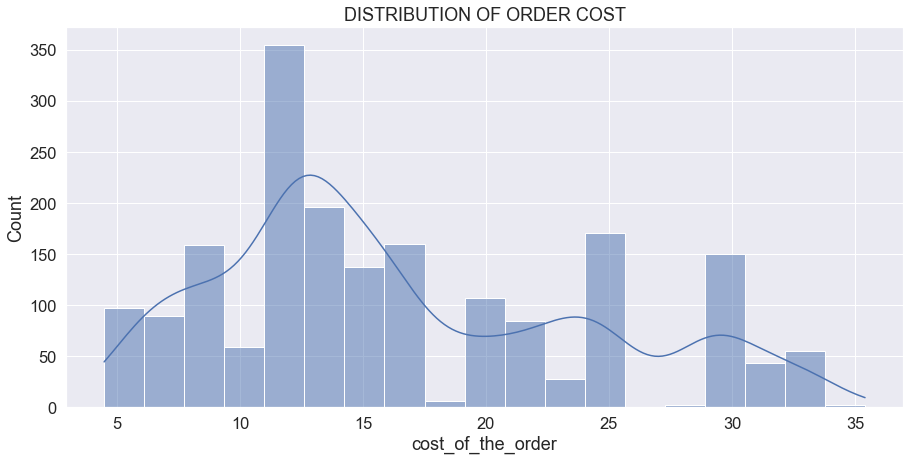

In [609]:
plt.figure(figsize=(15, 7))
sns.set(font_scale=1.5)
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('DISTRIBUTION OF ORDER COST');

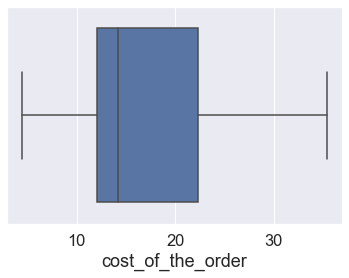

In [29]:
sns.set(font_scale=1.5)
sns.boxplot(data=df, x='cost_of_the_order');

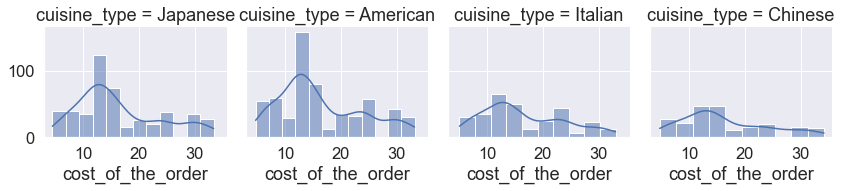

In [612]:
g= sns.FacetGrid(df[df['cuisine_type'].isin(['American','Italian', 'Japanese','Chinese'])], 
                 col='cuisine_type')
g.map(sns.histplot, 'cost_of_the_order', kde=True);

### Observation 4:
- The Distribution of order cost looks like not evenly distributed.
- The graphs have a right skewed distribution without outliers. 
- The cost of order is range from 5USD to 35USD
- Most of the time, people order their food around 14USD.
- So, people dont order expensive food or make big orders for delivery with this app.

In [37]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

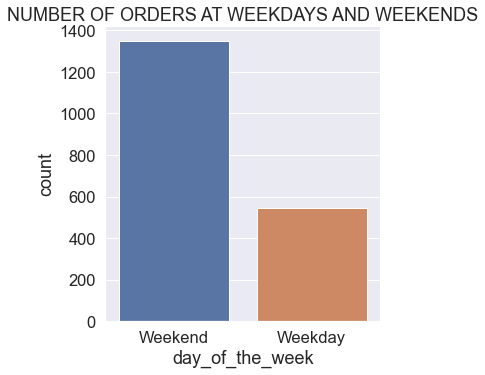

In [614]:
sns.catplot(data=df, x='day_of_the_week', kind='count')
plt.title('NUMBER OF ORDERS AT WEEKDAYS AND WEEKENDS');

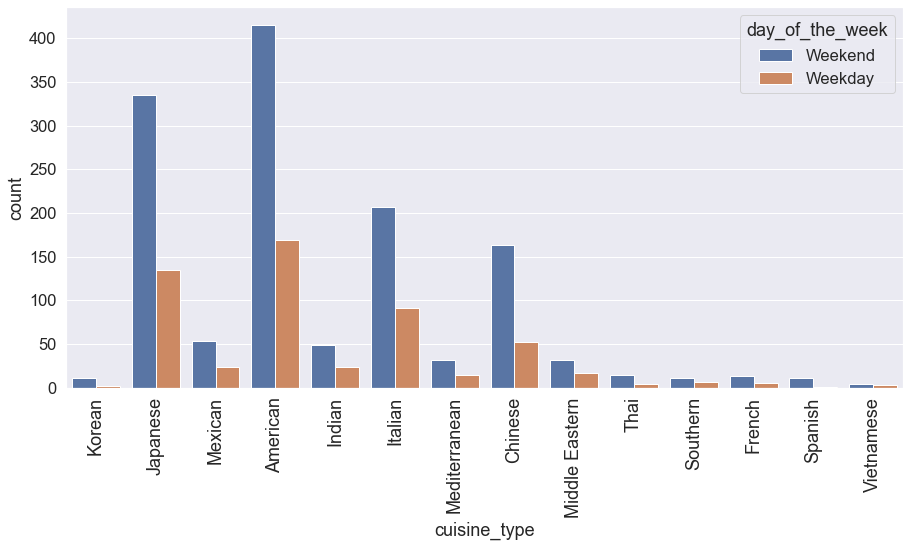

In [41]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90, fontsize=18);

### Observations 5:
- In general, there are lots of orders placed in weekend more than weekdays. a
- In details, the number of orders placed at weekends approximately doubles the number of orders placed in weekdays at every restaurants.
- All the restaurants are very busy at weekends rather than weekdays.

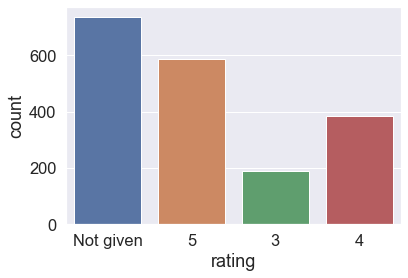

In [44]:
sns.countplot(data=df, x='rating');

### Observation 6:
- There are only 3 discrete values of rating: 3, 4, 5 stars.
- Within orders rated, mostly customers give 5 stars.
- The mininum rating is 3 stars.
- Overall, the customers are pretty much satisfied with their orders. There is no bad ratings (1 or 2 stars).


In [6]:
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [7]:
rating = pd.DataFrame(data=[df['rating'].value_counts(normalize=True)[0]*100, 
        df['rating'].value_counts(normalize=True).sum()*100 - df['rating'].value_counts(normalize=True)[0]*100],
        columns=['rating'], index = ['Not given', 'Given'])
rating

,rating
Not given,38.777661
Given,61.222339


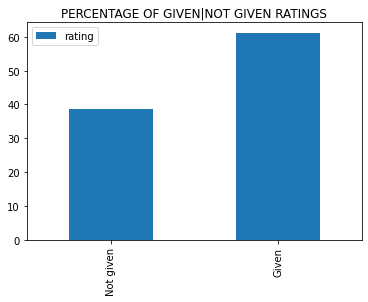

In [9]:
rating.plot(kind='bar')
plt.title('PERCENTAGE OF GIVEN|NOT GIVEN RATINGS');

### Observation 7:
- Around 40% of orders not rated. More than 60% of total order customer giving ratings.
- The number of people not rating is quite high, it may be because of the inconvience, time wasting, complicated process of rating feature within the app. The reason also might be customers are not encouraged to rate because they order only 1 or 2 times, rating does not bring them any benefits.
- Rating is important for a business. To help impove the qualification of services and push more sales, the company should find a way to get all the customers rate. 

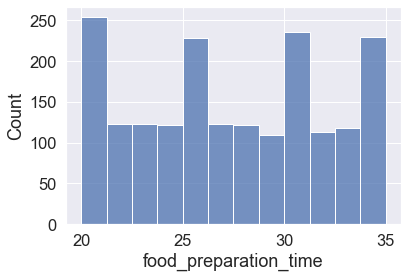

In [84]:
sns.histplot(data=df, x='food_preparation_time');

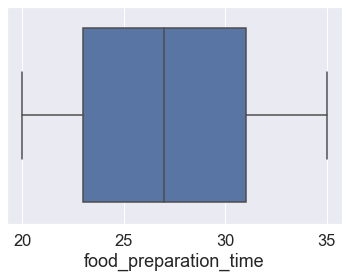

In [581]:
sns.boxplot(data=df, x='food_preparation_time');

### Observation 8:
- The maxinum to prepare food is 35 minutes.
- There is not outliers which means there is no oders taken too long or more than 35 minutes. 
- The average time for the food getting prepared is around 27 minutes.
- It takes minimun 20 minutes to get the food ready for delivery which is quite high for some small orders.
- Restaurants can improve customer's satisfication and earn more revenue by reducing the time for preparing food.


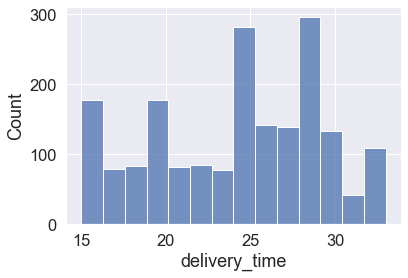

In [87]:
sns.histplot(data=df, x='delivery_time');

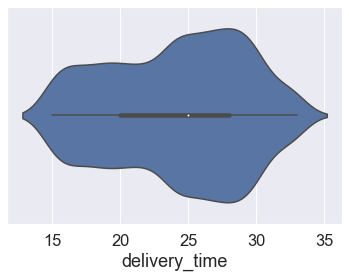

In [578]:
sns.violinplot(data=df, x='delivery_time');

### Observation 9:
- The mininum time for delivery is around 15 minutes and the maxinum time for delivery is 33 minutes.
- The average delivery time is around 24 minutes.
- There is no outliers for delivery time.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [90]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
- Top 5 restaurants which have the highest number of order are : Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.
   

### **Question 8**: Which is the most popular cuisine on weekends? 

In [625]:
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
- American cuisine is the most popular cuisine on weekends with 415 orders.

In [626]:
# Another way to do this question:
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().sort_values(
    ascending=False).head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
- American cuisine is the most popular cuisine on weekends with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? 

In [627]:
len(df[df['cost_of_the_order']>20])/len(df)*100

29.24130663856691

#### Observations:
- 29.24% of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time? 

In [628]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The mean of delivery time is around 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [629]:
df['customer_id'].value_counts().sort_values(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- The IDs of the customers who order the most are: 
    - 52832 made 13 orders,
    - 47440 made 10 orders, 
    - 83287 made 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


In [630]:
a = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index()
a

,cuisine_type,restaurant_name
0,American,41
1,Chinese,16
2,French,3
3,Indian,14
4,Italian,31
5,Japanese,29
6,Korean,5
7,Mediterranean,5
8,Mexican,11
9,Middle Eastern,7


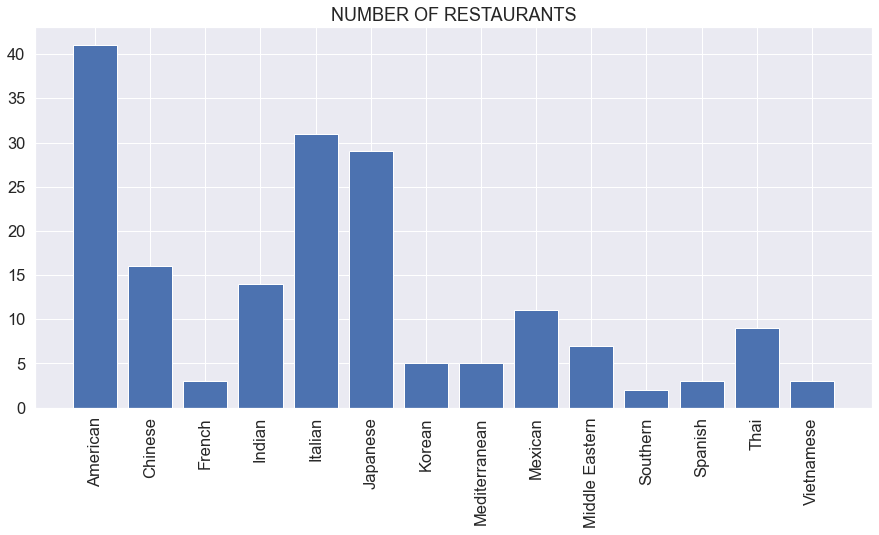

In [633]:
plt.figure(figsize = (15,7))
plt.bar(a['cuisine_type'], a['restaurant_name'])
plt.title('NUMBER OF RESTAURANTS')
plt.xticks(rotation=90);

### Observation 1:
- American cuisine has the most number of restaurant, followed by Italian and Japanese cuisines.
- Southern cuisine has the least number of restaurant (which is only 2).

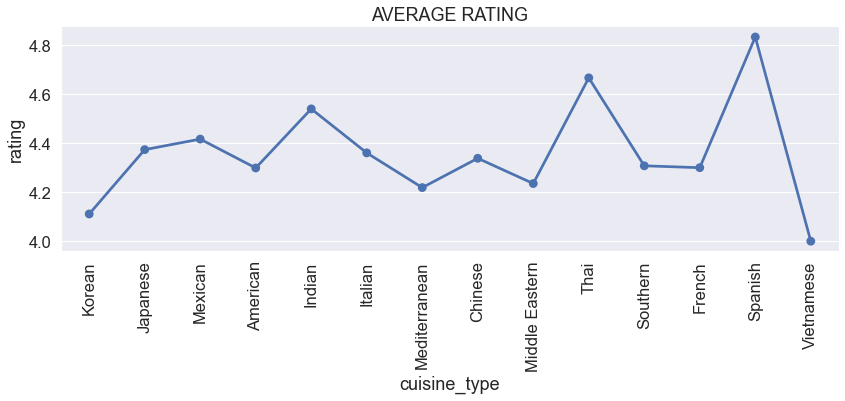

In [634]:
sns.catplot(data=df_nan, x='cuisine_type', y='rating', kind='point', 
            estimator=np.mean, height=4, aspect =3, ci=None);
plt.xticks(rotation = 90)
plt.title('AVERAGE RATING');

### Observation 2:
- Spanish cuisine has the highest average ratings; followings are Thai and Indian.
- The Vietnames cuisine has the lowest rating.
- Eventhough American cuisine is the most popular cuisine, its rating is around the averge rating.


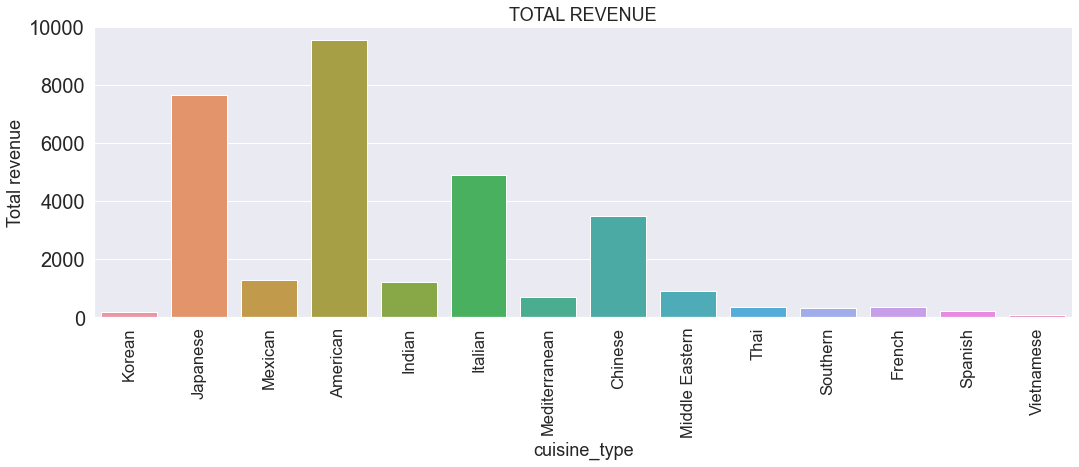

In [635]:
sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order', 
            estimator = np.sum, ci=None, kind='bar', height = 5, aspect = 3 )
plt.xticks(rotation=90)
plt.yticks(fontsize = 20)
plt.ylabel('Total revenue')
plt.title('TOTAL REVENUE');

### Obsevation 3:
- The American cuisine earn the most revenue, followed by Japanese and Italian.
- The Vietnamese cuisine earn the least revenue.

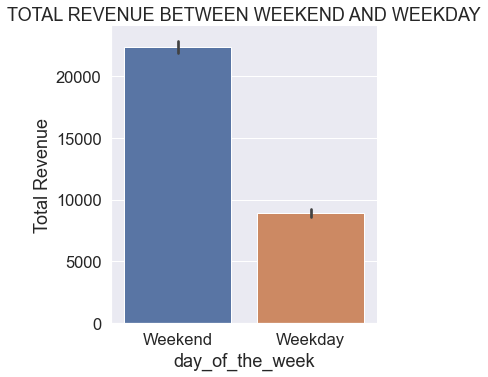

In [636]:
sns.catplot(data=df, x='day_of_the_week', y ='cost_of_the_order', kind='bar', estimator=np.sum);
plt.ylabel('Total Revenue')
plt.title('TOTAL REVENUE BETWEEN WEEKEND AND WEEKDAY');

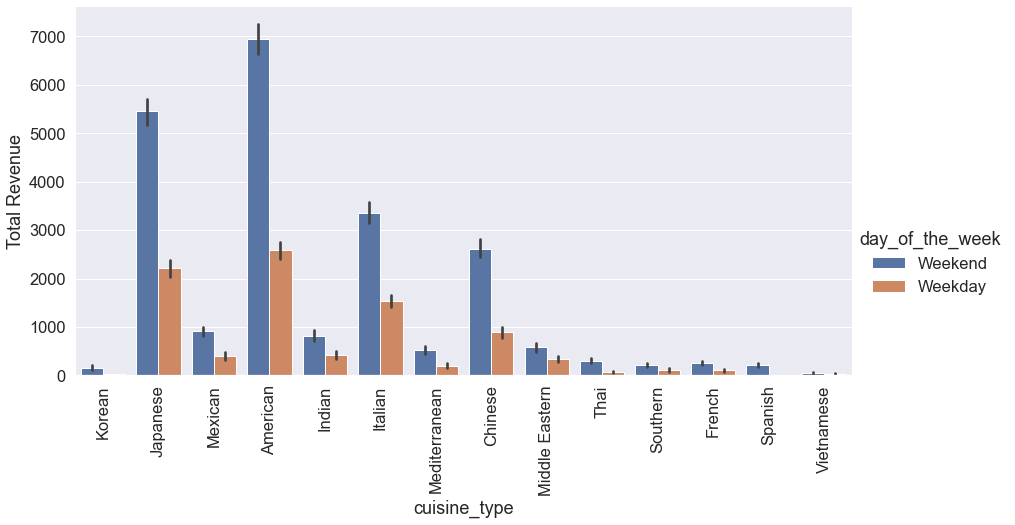

In [638]:
sns.catplot(data=df, x='cuisine_type', y ='cost_of_the_order', kind='bar', 
            hue='day_of_the_week',estimator=np.sum, height=6, aspect=2);
plt.ylabel('Total Revenue')
plt.xticks(rotation=90);

### Observation 4:
- Total revenue earned from all restaurant at weekend is more than two times compared to revenue earned at week days.

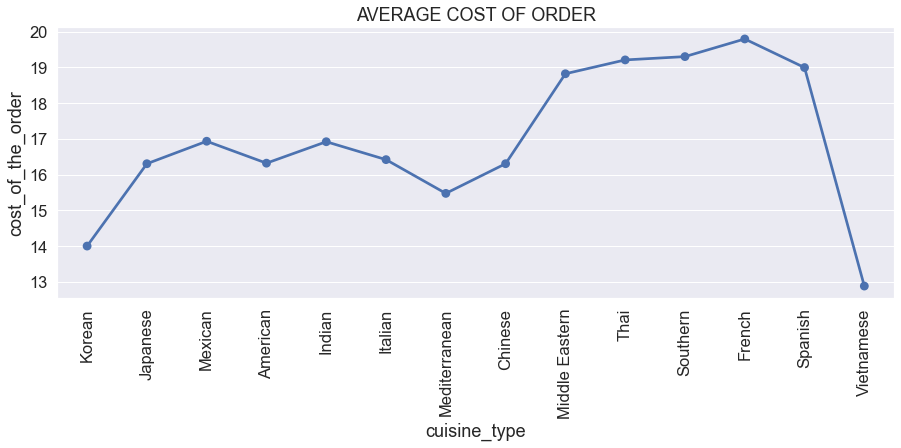

In [639]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=df, x='cuisine_type', y='cost_of_the_order',
              estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('AVERAGE COST OF ORDER');

### Observation 5:
- French and Southern restaurants have the highest average cost of order.
- The Vietnames restaurants are offering the lowest average cost of order.

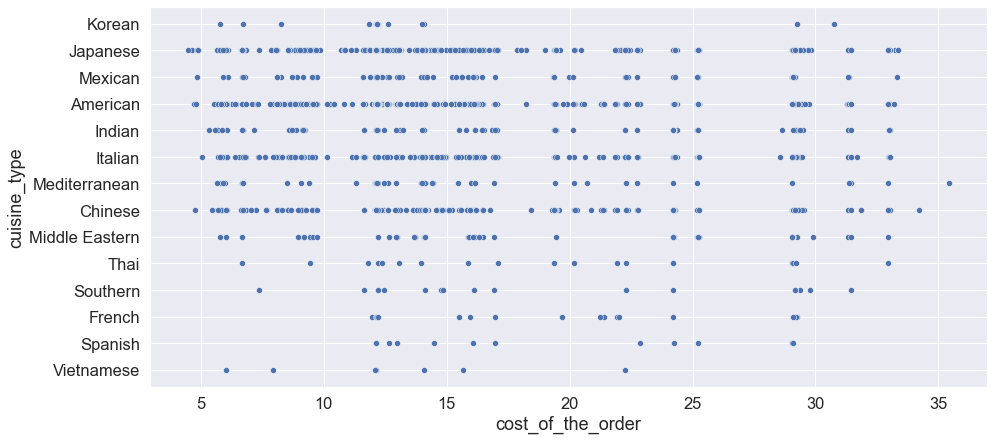

In [473]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_nan, y='cuisine_type', x='cost_of_the_order');

### Observation 6:
- Japanese, American, Italian, and Chinese cuisine have the most dense scatter with the widest range of  order cost.
- French, Spanish, Vietnames cuisine have least orders with narrow range of order cost.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


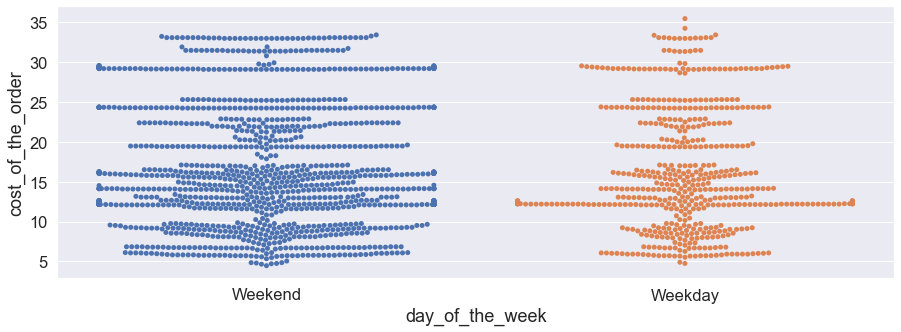

In [640]:
plt.figure(figsize=(15, 5))
sns.swarmplot(data=df, x='day_of_the_week', y ='cost_of_the_order')
plt.show();

### Observation 7:
- In weekdays, most customers often order around 12-13USD. 
- In weekends, most customers order around 7-17USD.

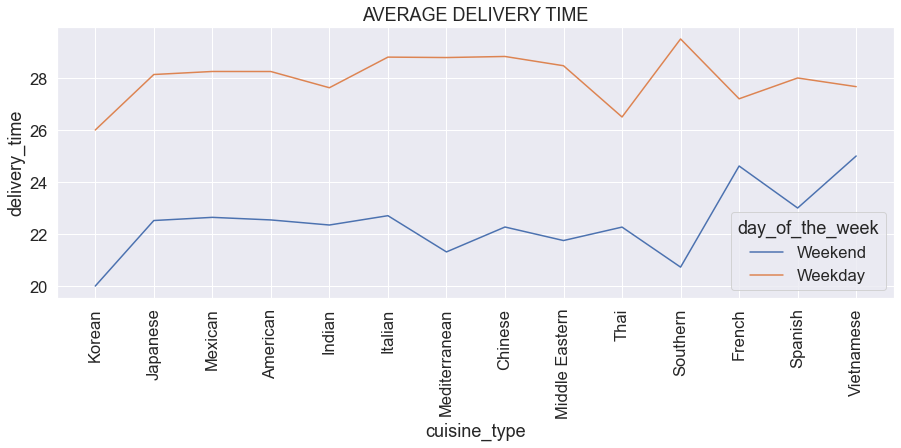

In [641]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='cuisine_type', y='delivery_time', estimator = 'mean', ci=None, hue='day_of_the_week')
plt.xticks(rotation=90)
plt.title('AVERAGE DELIVERY TIME');

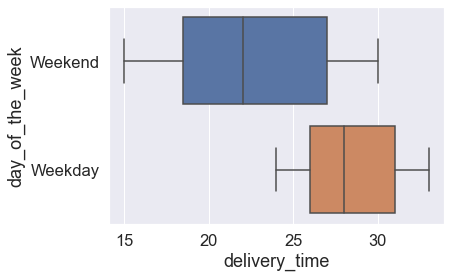

In [642]:
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week', dodge=True);

### Observation 8:
- The graph shows in overall, the delivery time in weekdays is longer than weekends. This can be understandble because there are always traffic for working hours in weekdays.
- The delivery time is almost same between those restaurants.

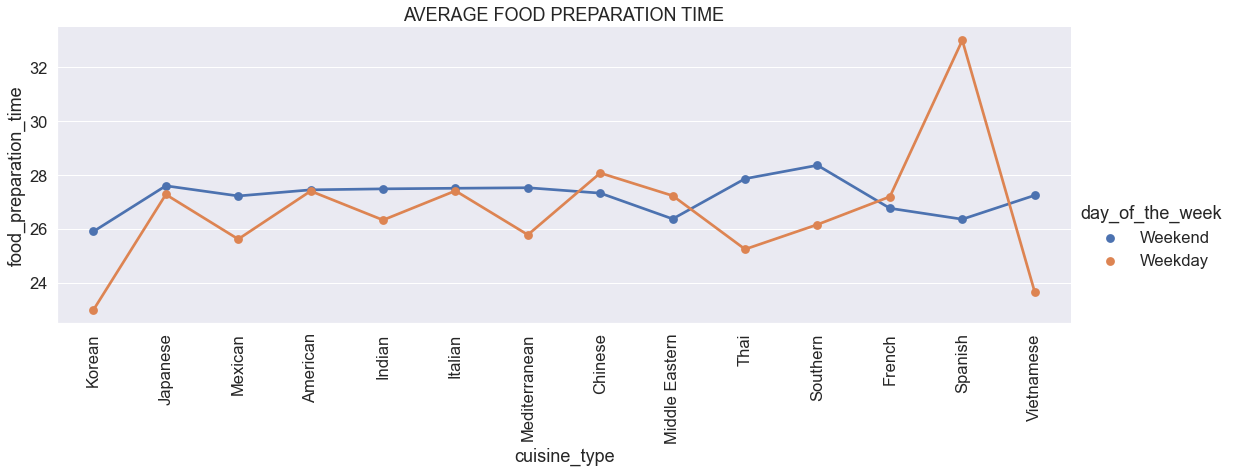

In [643]:
sns.catplot(data=df, x='cuisine_type', y='food_preparation_time', 
            kind='point', estimator=np.mean, height=5, aspect=3, ci=None,hue='day_of_the_week')
plt.xticks(rotation=90)
plt.title('AVERAGE FOOD PREPARATION TIME');

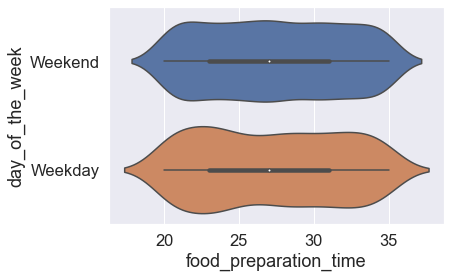

In [644]:
sns.violinplot(data=df, x='food_preparation_time', y ='day_of_the_week', dodge=True);

### Observation 9:
- Eventhough there are more orders in the weekends, the average time for preparation is not too much different between weekends and weekdays. Other word, the distribution for preparing food is same between restaurants and day of week.
- Only Spanish restaurant has a bit higher preparation time compared to the others.

<Figure size 1080x504 with 0 Axes>

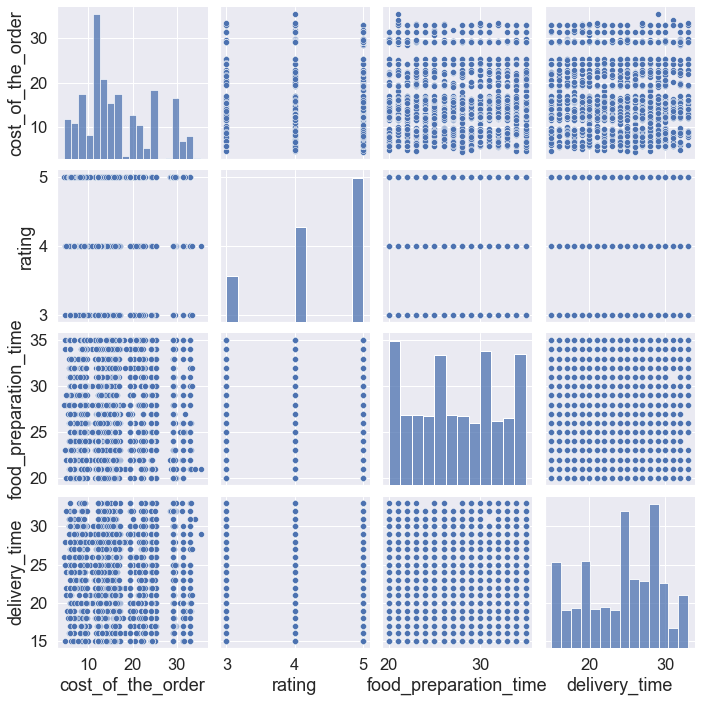

In [650]:
plt.figure(figsize=(15, 7))
sns.pairplot(data = df_nan[['cost_of_the_order','rating',
                            'food_preparation_time', 'delivery_time']]);

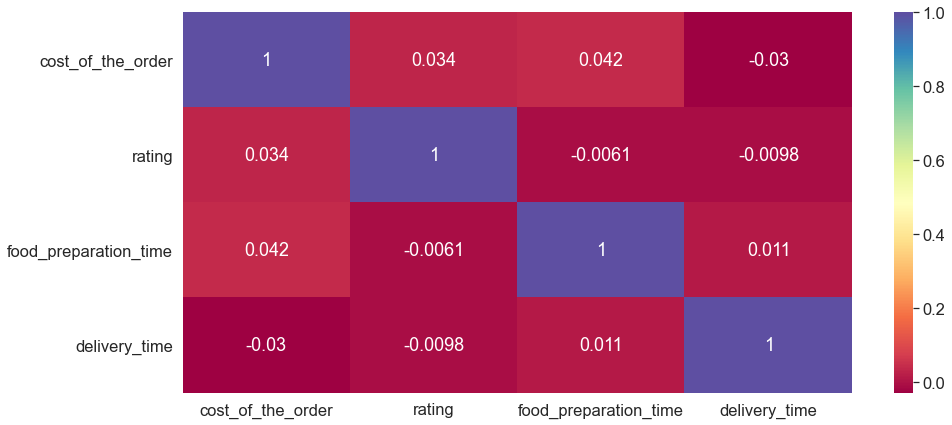

In [646]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_nan[['cost_of_the_order','rating','food_preparation_time', 
                    'delivery_time']].corr(), annot=True, cmap='Spectral');

### Observation 10:
- The correlations are so low between those variables.
- So, rating, preparing time, delivery time, and order cost are not related.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [651]:
df_nan = df.replace(to_replace='Not given', value = np.NaN)

In [652]:
df_nan.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51


In [653]:
df_nan['rating'] = df_nan['rating'].astype(dtype='float', errors='ignore')

In [654]:
a = df_nan.groupby('restaurant_name')['rating'].mean()
a

restaurant_name
'wichcraft          5.000000
12 Chairs           4.500000
5 Napkin Burger     4.000000
67 Burger           5.000000
Alidoro                  NaN
                      ...   
Zero Otto Nove      4.000000
brgr                3.000000
da Umberto          5.000000
ilili Restaurant    4.153846
indikitch           4.500000
Name: rating, Length: 178, dtype: float64

In [655]:
b = df_nan.groupby('restaurant_name')['rating'].count()
b

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating, Length: 178, dtype: int64

In [657]:
c = pd.merge(a,b,how='inner', on = a.index)
c

,key_0,rating_x,rating_y
0,'wichcraft,5.000000,1
1,12 Chairs,4.500000,2
2,5 Napkin Burger,4.000000,2
3,67 Burger,5.000000,1
4,Alidoro,NaN,0
...,...,...,...
173,Zero Otto Nove,4.000000,1
174,brgr,3.000000,1
175,da Umberto,5.000000,1
176,ilili Restaurant,4.153846,13


In [659]:
c[(c['rating_x'] > 4) & (c['rating_y'] > 50)]
    

,key_0,rating_x,rating_y
20,Blue Ribbon Fried Chicken,4.328125,64
21,Blue Ribbon Sushi,4.219178,73
136,Shake Shack,4.278195,133
153,The Meatball Shop,4.511905,84


#### Observations:
- There are 4 restaurants that have average rating greater than 4 and rating count more than 50. Those are : Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [660]:
df.head(2)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48


In [661]:
revenue_25 = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25
revenue_15 = df[df['cost_of_the_order']>5]['cost_of_the_order'].sum()*0.15
net_revenue = revenue_25 + revenue_15
net_revenue

8379.539499999999

#### Observations:
- Net revenue generated by the company across all orders is $8379.539499999999

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [662]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [663]:
len(df[df['total_time']>60]) / len(df) *100

10.537407797681771

#### Observations:
- 10.54% of orders take more than 60 minutes to get delivered from the time the order is place.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [664]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [665]:
df[df['day_of_the_week']=='Weekday']['delivery_time'].mean() - df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()

5.870014357297798

#### Observations:
- The mean delivery time for weekday is 28.340037.
- The mean delivery time for weekend is 22.470022.
- The difference for delivery time between weekday and weekend is 5.870014357297798.

### Conclusion and Recommendations

### Conclusions:
1. The top 4 cuisine which customers order the most include `American`, `Japanese`, `Italian`, and `Chinese`. The `Vietnames` cuisine is least popular cuisine.
2. `Spanish` cuisine has the highest average ratings; followings are `Thai` and `Indian`. The `Vietnames` cuisine has the lowest rating.
3. The `Shake Shack`, `The Meatball Shop` and `Blue Ribbon Sushi` are the most three popular restaurants.
4. Mostly, customers order only one or two times with the app. The app does not have many loyal customers.
5. People dont order expensive food or make big orders for delivery with this app.
6. There are lots of orders placed in weekend more than weekdays. 
7. The customers are pretty much satisfied with their orders. There is no bad ratings (1 or 2 stars).
8.  The number of people not rating is quite high.
9. It takes minimun 20 minutes and maxinum 35 minutes to get the food ready for delivery which is quite high.
10. The average delivery time is around 24 minutes. There is no outliers for delivery time.
11. French and Southern restaurants have the highest average cost of order. The `Vietnames` restaurants are offering the lowest average cost of order.
12. The `American` restaurants earn the most revenue, followed by `Japanese` and `Italian`. The Vietnamese restaurants earn the least revenue.
13. Total revenue earned from all restaurant at weekend is more than two times compared to revenue earned at week days.
14. The delivery time in weekdays is longer than weekends. This can be understandble because there are always traffic for working hours in weekdays.The delivery time pattern is almost same between those restaurants.
15. The correlations are so low between those variables: `rating`, `preparing time`, `delivery time`, and `order cost`.

### Recommendations:
- Customers prefer the most 4 cuisine include American, Italian, Chinese, and Japanese. Also, those are cuisines which bring the most order and most revenue in the app. So the company should try to push more sales by bringing more new customers and maintaining current customers to gain more revenue.
- Customers dont place the big order within the app (max order around 35USD). Since The Shake Shack, The Meatball Shop and Blue Ribbon Sushi are the most popular restaurants, the company can push more sales and earn more profit by creating promotion/reward programs to encourage customers making big orders.
- Rating is important for a business. To help impove the qualification of services and push more sales, the company should find a way to encourage all the customers rate like making the rating process easier, faster and more convinient.
- Restaurants can improve customer's satisfication and earn more revenue by reducing the time for preparing food. The company can encourage restaurants to make food quicker by giving them a lower charges on orders make fast with high ratings.
- The app does not have many loyal customers. So the company should work on how to keep customers using its app ordering food. For example, the company can create a reward system like giving the customers some points based on numbers and cost of the orders, when the points reach at some level, customers can get a discount coupon or free meals.
- Delivery time is quite high in weekdays, so the company should work with the delivery parties to fix this problem.
- The company may also attract/introduce customers with restaurants/cuisines which are having low volumn (Vietnames, Thai, Spainish) by giving away the first orders or discount promotions.




---